In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data/winequality-red.csv', sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
for i, row in data.iterrows():
    value = row['quality']
    if value <= 6:
        data.at[i, 'quality'] = 0
    else:
        data.at[i, 'quality'] = 1

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [8]:
correlated_features = data[['fixed acidity', 'citric acid', 'density', 'free sulfur dioxide', 'total sulfur dioxide']]

# Apply PCA (choosing 2 components since we had 2 main groups of correlation)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(correlated_features)

# Add PCA components to DataFrame
data['PCA_Acidity_Density'] = pca_components[:, 0]
data['PCA_Sulfur'] = pca_components[:, 1]

# Drop original correlated features
data.drop(['fixed acidity', 'citric acid', 'density', 'free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

In [9]:
data.insert(8, 'quality_', data.pop('quality'))

In [10]:
data

,volatile acidity,residual sugar,chlorides,pH,sulphates,alcohol,PCA_Acidity_Density,PCA_Sulfur,quality_
0,0.700,1.9,0.076,3.51,0.56,9.4,-13.226635,-2.002482,0
1,0.880,2.6,0.098,3.20,0.68,9.8,22.034336,4.418610,0
2,0.760,2.3,0.092,3.26,0.65,9.8,7.161092,-2.489491,0
3,0.280,1.9,0.075,3.16,0.58,9.8,13.432465,-1.935291,0
4,0.700,1.9,0.076,3.51,0.56,9.4,-13.226635,-2.002482,0
...,...,...,...,...,...,...,...,...,...
1594,0.600,2.0,0.090,3.45,0.58,10.5,1.134359,16.320640,0
1595,0.550,2.2,0.062,3.52,0.76,11.2,9.498436,21.623145,0
1596,0.510,2.3,0.076,3.42,0.75,11.0,-3.425795,14.267595,0
1597,0.645,2.0,0.075,3.57,0.71,10.2,1.136206,16.327697,0


<Axes: >

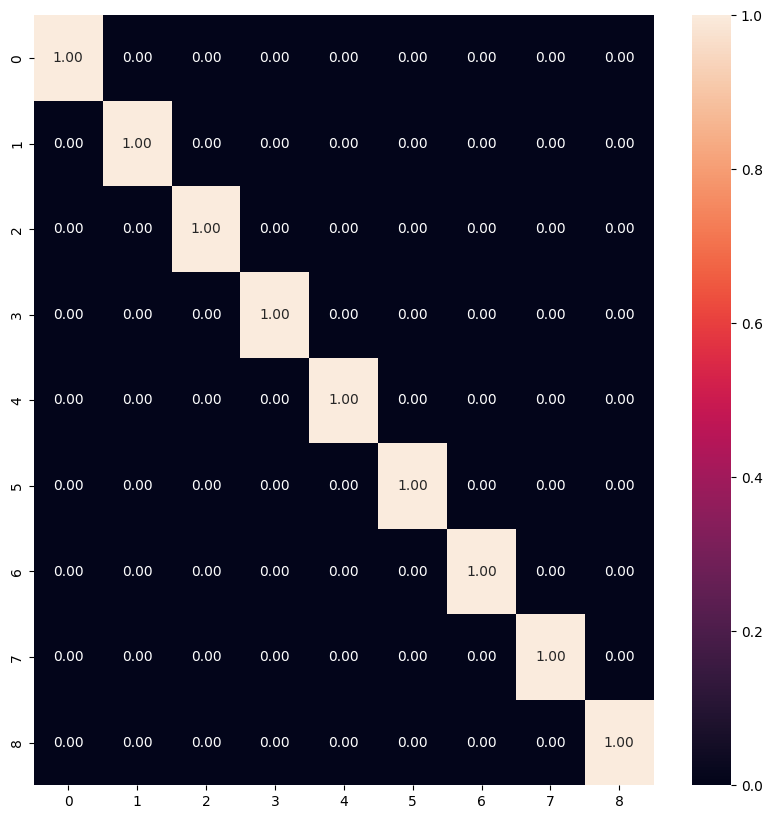

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(np.where(data.corr(numeric_only=True) > .5, data.corr(numeric_only=True), 0), annot=True, fmt='.2f')

In [12]:
data = data.drop(columns='quality_')

In [13]:
X = data.drop(columns='pH')
y = data['pH']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=42
)

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [17]:
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

RMSE: 0.13874353396594727
R2: 0.20737585796799707
MAPE: 0.03281067746674925
